# Breast Cancer Classification

In [201]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

# Load the data

In [203]:
df  = pd.read_csv(r"C:\Users\BG\Downloads\Breast_Cancer.csv", encoding='utf-8')
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


# Preprocessing and Visualization data

In [205]:
df.sample(5)
df.sample(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
3993,57,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Negative,27,1,93,Alive
3718,69,White,Widowed,T1,N1,IIA,Well differentiated,1,Regional,13,Positive,Positive,12,1,84,Alive
1335,36,Other,Single,T2,N1,IIB,Well differentiated,1,Regional,28,Positive,Positive,21,1,28,Dead
2087,57,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,12,Positive,Positive,13,2,54,Alive
3402,69,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,15,Positive,Positive,5,1,65,Alive
335,48,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,15,Positive,Positive,11,2,81,Alive
2609,59,White,Married,T2,N3,IIIC,Poorly differentiated,3,Regional,25,Positive,Positive,19,16,84,Dead
2874,48,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,35,Positive,Positive,24,1,103,Alive
3711,31,Black,Single,T2,N2,IIIA,Poorly differentiated,3,Regional,30,Negative,Negative,13,4,5,Dead
2908,35,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,50,Positive,Positive,17,1,74,Alive


In [207]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [209]:
df.shape

(4024, 16)

In [211]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [51]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [19]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [213]:
def bar_chart(feature):
    survived = df[df['Status']=='Alive'][feature].value_counts()
    dead = df[df['Status']=='Dead'][feature].value_counts()
    
    data = pd.DataFrame([survived,dead])
    
    data.index = ['Alive','Dead']
    
    data.plot(kind='bar',stacked=True, figsize=(10,6))
    plt.xticks(rotation=0)

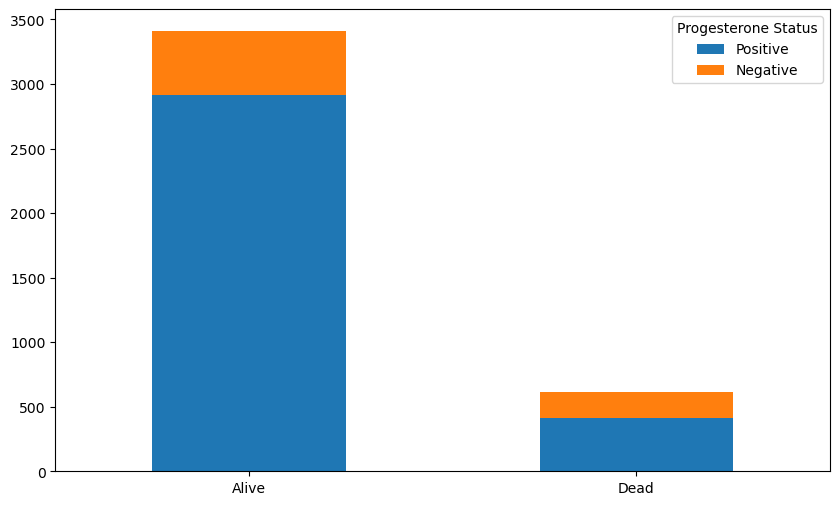

In [59]:
bar_chart('Progesterone Status')

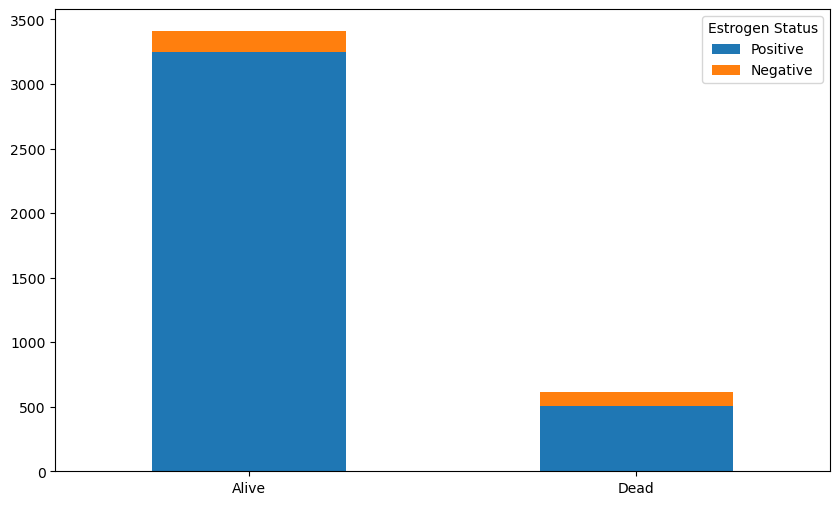

In [215]:
bar_chart('Estrogen Status')

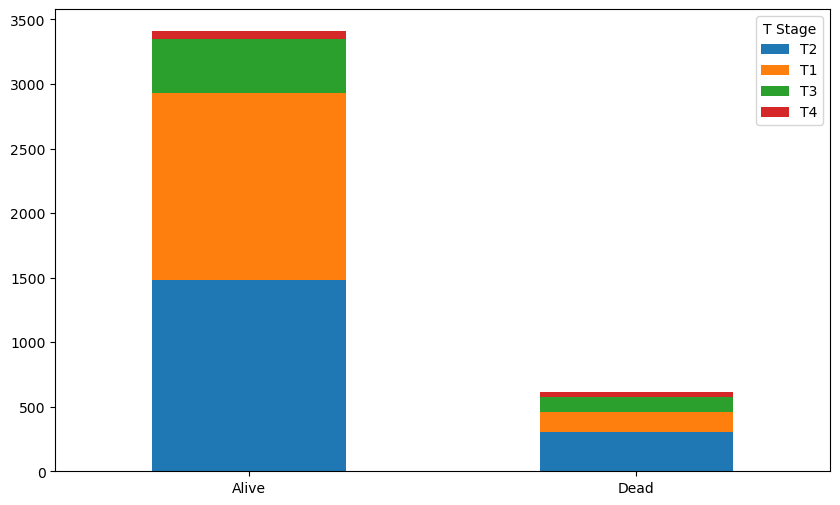

In [217]:
df['T Stage']=df['T Stage ']
df.drop(columns='T Stage ', inplace=True)
bar_chart('T Stage')

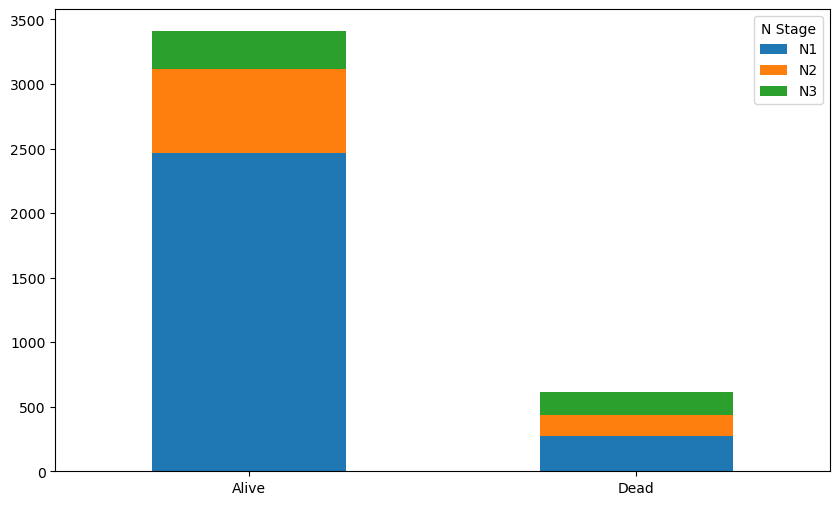

In [219]:
bar_chart('N Stage')

<Axes: xlabel='Status', ylabel='count'>

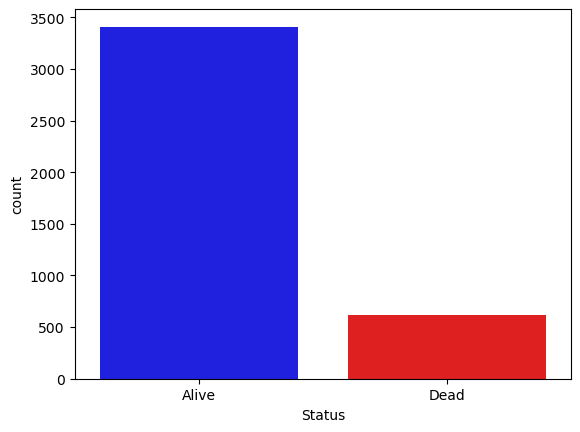

In [221]:
sns.countplot(x="Status", data=data , palette = (['b','r']))

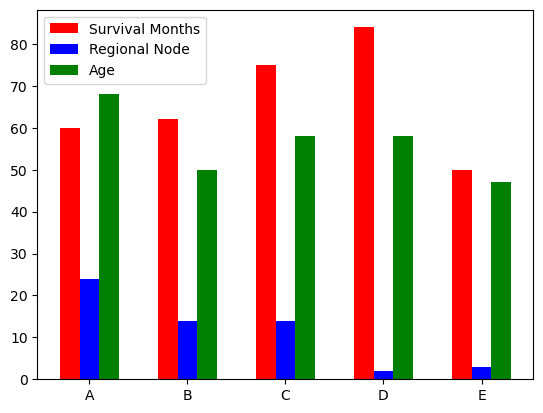

In [223]:
g1 = df['Survival Months'].head()
g2 = df['Regional Node Examined'].head()
g3 = df['Age'].head()

plt.subplots()
index = np.arange(5)
width = 0.2

plt.bar(index, g1, width, color='r', label='Survival Months')
plt.bar(index+width, g2, width, color='b', label='Regional Node')
plt.bar(index+ 2*width, g3, width, color='g', label='Age')

plt.xticks(index+width, ['A', 'B', 'C','D','E'])
plt.legend();

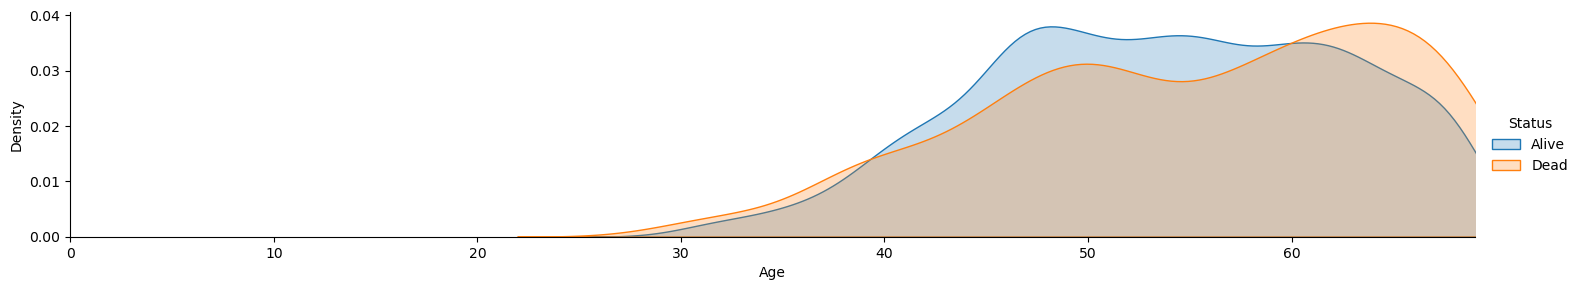

In [225]:
facet = sns.FacetGrid(df, hue='Status',aspect=5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.show()

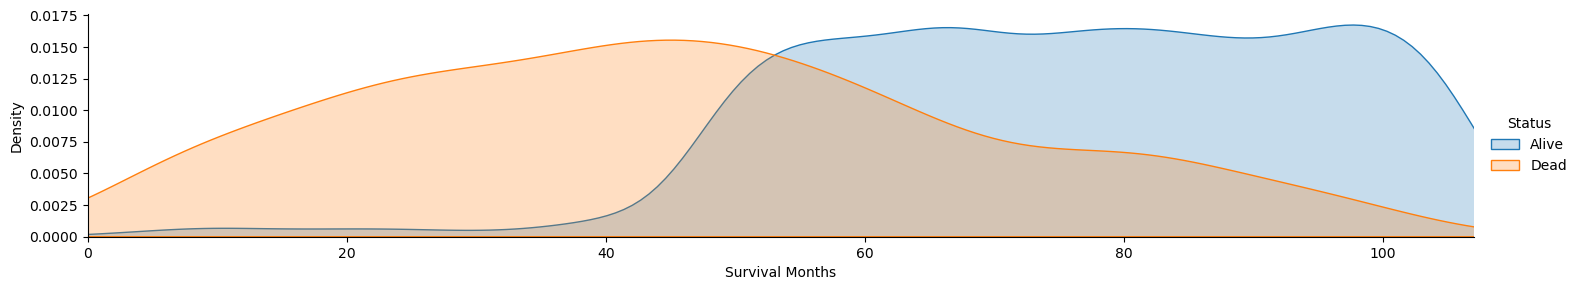

In [227]:
facet = sns.FacetGrid(df, hue='Status',aspect=5)
facet.map(sns.kdeplot, 'Survival Months', shade=True)
facet.set(xlim=(0, df['Survival Months'].max()))
facet.add_legend()
plt.show()

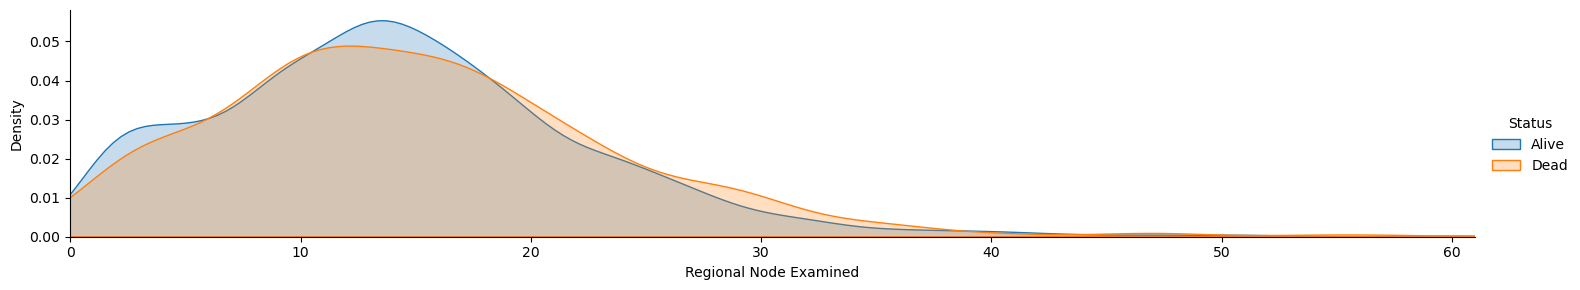

In [229]:
facet = sns.FacetGrid(df, hue='Status',aspect=5)
facet.map(sns.kdeplot, 'Regional Node Examined', shade=True)
facet.set(xlim=(0, df['Regional Node Examined'].max()))
facet.add_legend()
plt.show()

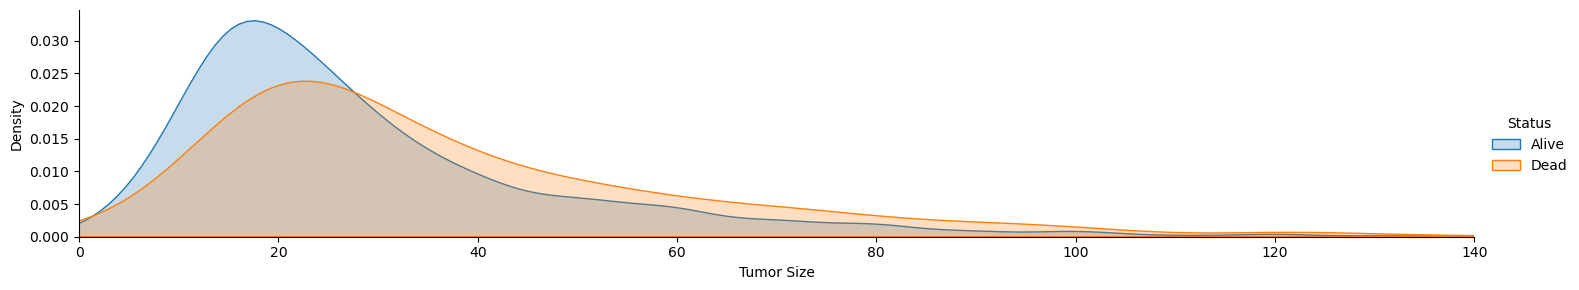

In [231]:
facet = sns.FacetGrid(df, hue='Status',aspect=5)
facet.map(sns.kdeplot, 'Tumor Size', shade=True)
facet.set(xlim=(0, df['Tumor Size'].max()))
facet.add_legend()
plt.show()

In [235]:
df['Grade'] = df['Grade'].replace(['1','2','3',' anaplastic; Grade IV'],[1,2,3,4])

In [237]:
df['Grade'].unique()

array([3, 2, 1, 4], dtype=int64)

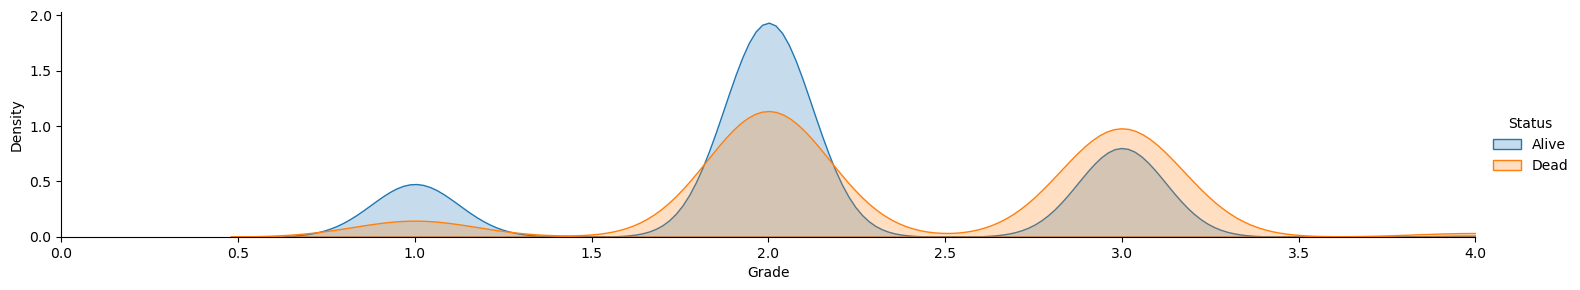

In [239]:
facet = sns.FacetGrid(df, hue="Status",aspect=5)
facet.map(sns.kdeplot,'Grade',shade= True)
facet.set(xlim=(0, df['Grade'].max()))
facet.add_legend()
 
plt.show() 

In [241]:
df['differentiate'].value_counts()

differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

In [243]:
df['differentiate'].unique()


array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [245]:
df['differentiate'] = df['differentiate'].replace(['Poorly differentiated','Moderately differentiated', 
                                                 'Well differentiated',], ['Poorly', 'Moderately', 'Well'])

In [247]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,Positive,Positive,24,1,60,Alive,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,Positive,Positive,14,5,62,Alive,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,Positive,Positive,14,7,75,Alive,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,Positive,Positive,2,1,84,Alive,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,Positive,Positive,3,1,50,Alive,T2


In [249]:
la = LabelEncoder()
df['Progesterone Status'] = la.fit_transform(df['Progesterone Status'])
df['Estrogen Status'] = la.fit_transform(df['Estrogen Status'])

In [251]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,1,1,24,1,60,Alive,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,1,1,14,5,62,Alive,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,1,1,14,7,75,Alive,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,1,1,2,1,84,Alive,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,1,1,3,1,50,Alive,T2


In [253]:
df['Status'] = df['Status'].replace(['Alive','Dead'], [1,0])
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,1,1,24,1,60,1,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,1,1,14,5,62,1,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,1,1,14,7,75,1,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,1,1,2,1,84,1,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,1,1,3,1,50,1,T2


In [255]:
df['T Stage']

0       T1
1       T2
2       T3
3       T1
4       T2
        ..
4019    T1
4020    T2
4021    T2
4022    T2
4023    T2
Name: T Stage, Length: 4024, dtype: object

In [259]:
df['T Stage'].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [261]:
df['T Stage'] = df['T Stage'].replace(['T1', 'T2', 'T3', 'T4'], [1, 2, 3, 4])
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,1,1,24,1,60,1,1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,1,1,14,5,62,1,2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,1,1,14,7,75,1,3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,1,1,2,1,84,1,1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,1,1,3,1,50,1,2


In [263]:
st = StandardScaler()
df['Survival Months'] = st.fit_transform(df['Survival Months'].values.reshape(-1,1))
df['Tumor Size'] = st.fit_transform(df['Tumor Size'].values.reshape(-1, 1))
df['Regional Node Examined'] = st.fit_transform(df['Regional Node Examined'].values.reshape(-1, 1))
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,58,White,Married,N1,IIA,Poorly,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,47,White,Married,N1,IIB,Poorly,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [265]:
df['Age'] = la.fit_transform(df['Age'])
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,White,Married,N1,IIA,Poorly,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,White,Married,N2,IIIA,Moderately,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,White,Divorced,N3,IIIC,Moderately,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,White,Married,N1,IIA,Poorly,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,White,Married,N1,IIB,Poorly,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [267]:
df['differentiate'].unique()

array(['Poorly', 'Moderately', 'Well', 'Undifferentiated'], dtype=object)

In [269]:
df['differentiate'] = df['differentiate'].replace(['Poorly','Moderately', 'Well','Undifferentiated'], [1, 2, 3, 4])
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,White,Married,N1,IIA,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,White,Married,N2,IIIA,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,White,Divorced,N3,IIIC,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,White,Married,N1,IIA,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,White,Married,N1,IIB,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [271]:
df['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [273]:
df['N Stage'] = df['N Stage'].replace(['N1','N2', 'N3'], [1, 2, 3])
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,White,Married,1,IIA,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,White,Married,2,IIIA,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,White,Divorced,3,IIIC,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,White,Married,1,IIA,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,White,Married,1,IIB,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [275]:
df['Race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [277]:
df['Race'] = df['Race'].replace(['White','Black', 'Other'], [1, 0, 2])
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,1,Married,1,IIA,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,1,Married,2,IIIA,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,1,Divorced,3,IIIC,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,1,Married,1,IIA,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,1,Married,1,IIB,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [279]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [281]:
df['Marital Status'] = df['Marital Status'].replace(['Married','Divorced', 'Single ', 'Widowed', 'Separated'], [1,0,2,3,4])
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,1,1,1,IIA,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,1,1,2,IIIA,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,1,0,3,IIIC,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,1,1,1,IIA,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,1,1,1,IIB,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [283]:
df['6th Stage'] = la.fit_transform(df['6th Stage'])
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,1,1,1,0,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,1,1,2,2,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,1,0,3,4,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,1,1,1,0,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,1,1,1,1,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [285]:
df['A Stage'] = la.fit_transform(df['A Stage'])
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,1,1,1,0,1,3,1,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,1,1,2,2,2,2,1,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,1,0,3,4,2,2,1,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,1,1,1,0,1,3,1,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,1,1,1,1,1,3,1,0.498475,1,1,-1.402343,1,-0.929288,1,2


Age                         int64
Race                        int64
Marital Status              int64
N Stage                     int64
6th Stage                   int32
differentiate               int64
Grade                       int64
A Stage                     int32
Tumor Size                float64
Estrogen Status             int32
Progesterone Status         int32
Regional Node Examined    float64
Reginol Node Positive       int64
Survival Months           float64
Status                      int64
T Stage                     int64
dtype: object


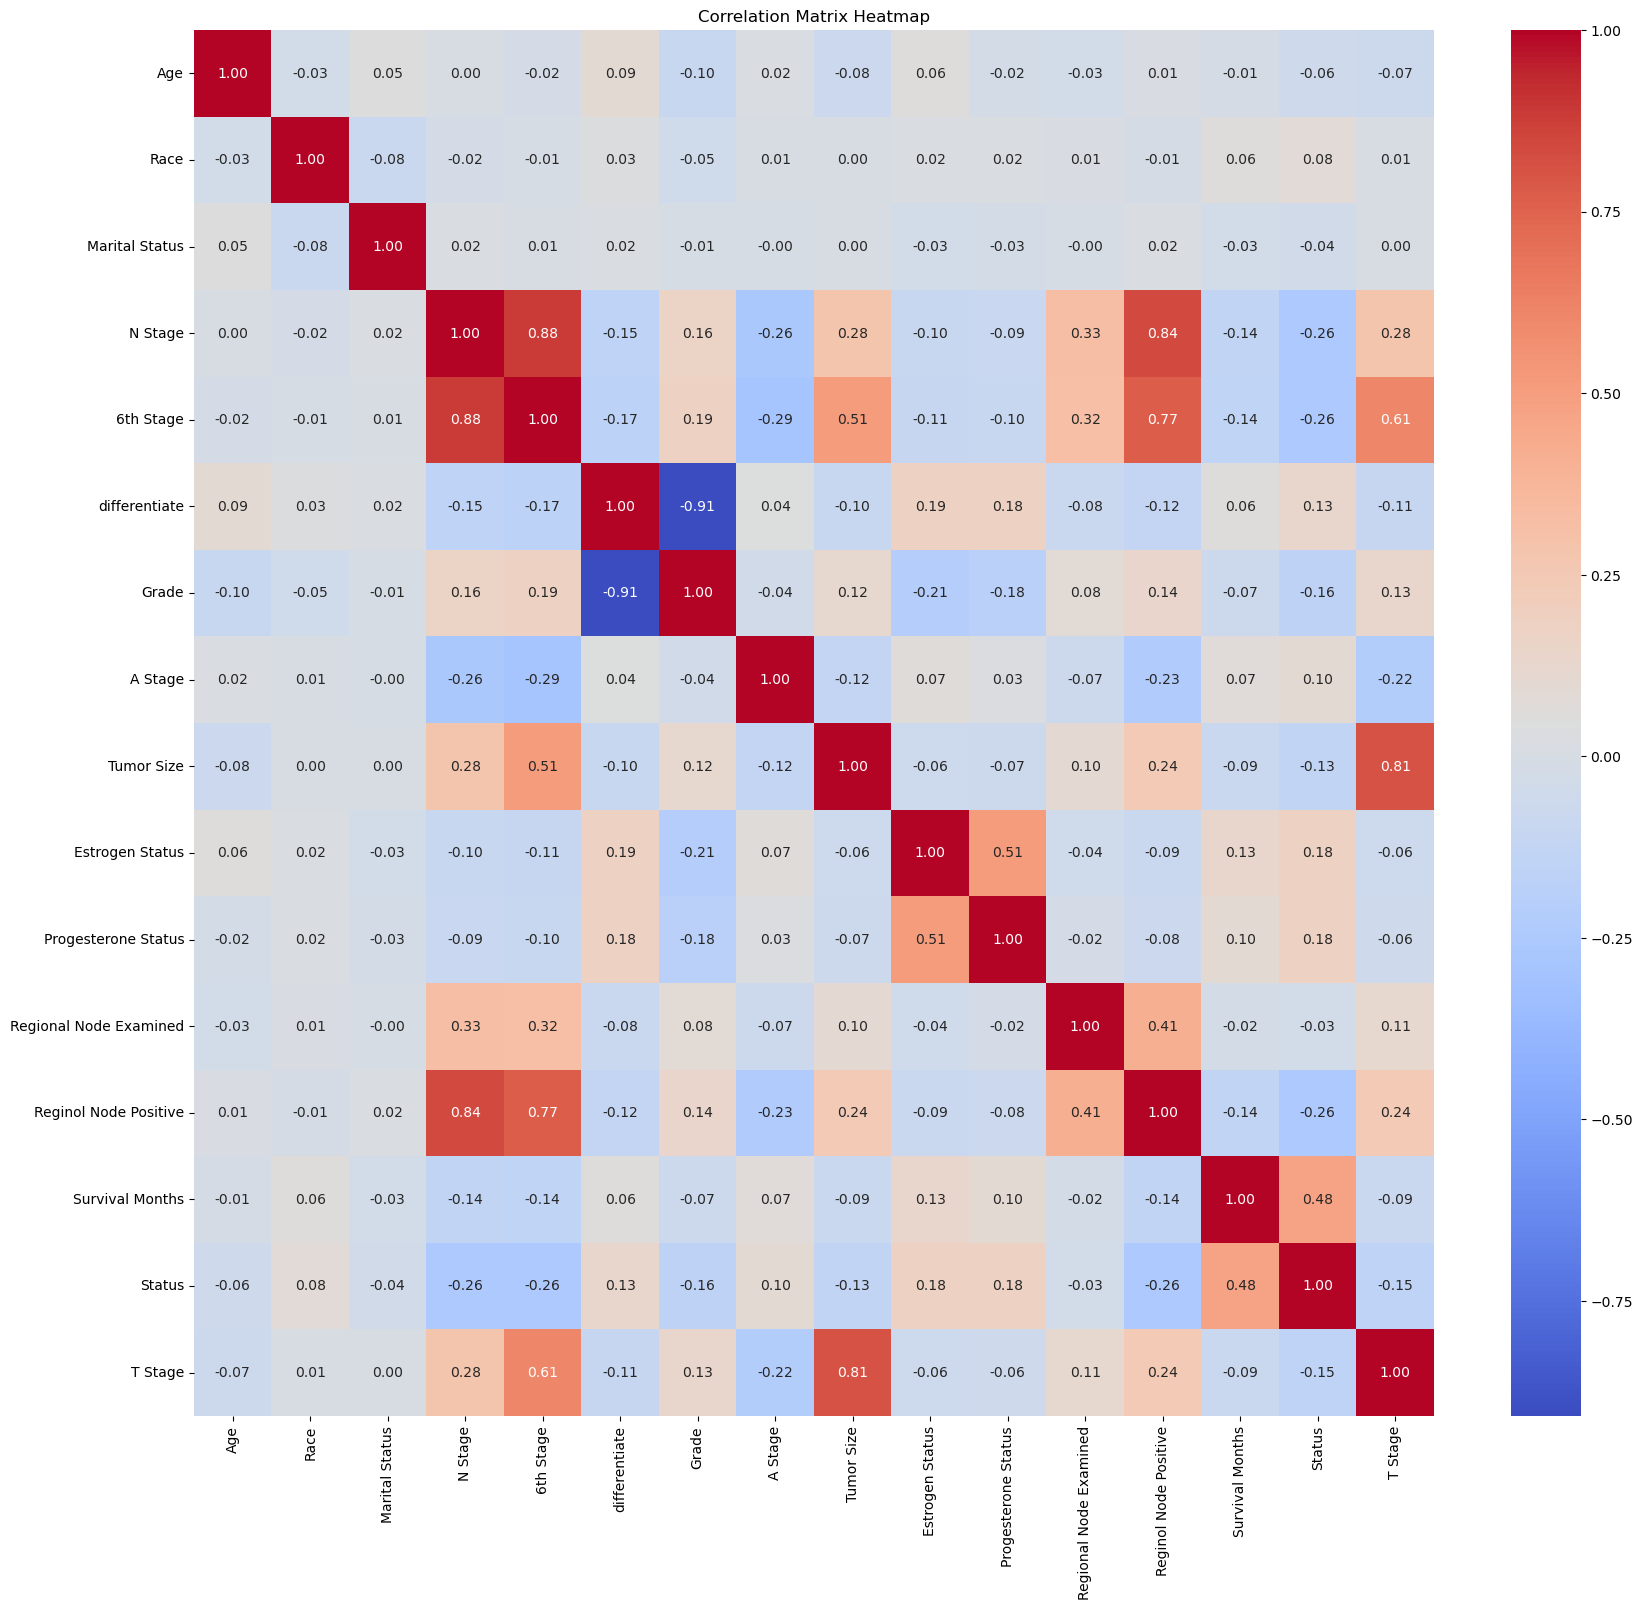

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(df.dtypes)

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# Create Models

In [289]:
# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=40)


In [291]:
x = df.drop('Status',axis=1)
y = df['Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

In [293]:
from sklearn.metrics import classification_report


In [295]:
def all(model):
    model.fit(x_train,y_train.astype(int))
    pre = model.predict(x_test)
    print(confusion_matrix(pre, y_test.astype(int)))
    print(classification_report(pre, y_test.astype(int)))
    print('score_test = ', model.score(x_test, y_test.astype(int))*100)
    print('score_train = ', model.score(x_train, y_train.astype(int))*100)

# KNN

In [297]:
model_1 = KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=40)
all(model_1)

[[  70   32]
 [ 291 2022]]
              precision    recall  f1-score   support

           0       0.19      0.69      0.30       102
           1       0.98      0.87      0.93      2313

    accuracy                           0.87      2415
   macro avg       0.59      0.78      0.61      2415
weighted avg       0.95      0.87      0.90      2415

score_test =  86.62525879917185
score_train =  87.13486637663145


# SupportVectorMachine

In [299]:
model_2 = SVC(kernel='rbf', degree=4, random_state=40)
all(model_2)

[[   0    0]
 [ 361 2054]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.85      0.92      2415

    accuracy                           0.85      2415
   macro avg       0.50      0.43      0.46      2415
weighted avg       1.00      0.85      0.92      2415

score_test =  85.05175983436854
score_train =  84.15164698570541


# DecisionTree

In [301]:
model_3 = DecisionTreeClassifier()
all(model_3)

[[ 197  231]
 [ 164 1823]]
              precision    recall  f1-score   support

           0       0.55      0.46      0.50       428
           1       0.89      0.92      0.90      1987

    accuracy                           0.84      2415
   macro avg       0.72      0.69      0.70      2415
weighted avg       0.83      0.84      0.83      2415

score_test =  83.64389233954451
score_train =  100.0


# LogisticRegression

In [303]:
model_4 = LogisticRegression()
all(model_4)

[[ 161   48]
 [ 200 2006]]
              precision    recall  f1-score   support

           0       0.45      0.77      0.56       209
           1       0.98      0.91      0.94      2206

    accuracy                           0.90      2415
   macro avg       0.71      0.84      0.75      2415
weighted avg       0.93      0.90      0.91      2415

score_test =  89.73084886128365
score_train =  88.81292728402734


# RandomForest

In [307]:
model_6 = RandomForestClassifier(n_estimators=200, max_depth=50)
all(model_6)

[[ 179   37]
 [ 182 2017]]
              precision    recall  f1-score   support

           0       0.50      0.83      0.62       216
           1       0.98      0.92      0.95      2199

    accuracy                           0.91      2415
   macro avg       0.74      0.87      0.78      2415
weighted avg       0.94      0.91      0.92      2415

score_test =  90.93167701863354
score_train =  100.0


# GradientBoosting

In [311]:
model_7 = GradientBoostingClassifier()
all(model_7)

[[ 186   58]
 [ 175 1996]]
              precision    recall  f1-score   support

           0       0.52      0.76      0.61       244
           1       0.97      0.92      0.94      2171

    accuracy                           0.90      2415
   macro avg       0.74      0.84      0.78      2415
weighted avg       0.93      0.90      0.91      2415

score_test =  90.351966873706
score_train =  92.72840273461777


# Final output and accuracy

In [313]:
from IPython.display import display, HTML

html_results = """
The accuracy of Logistic Regression Model is <b>89.68%</b><br>
The accuracy of Random Forest Model is <b>90.93%</b><br>
The accuracy of SVM Model is <b>85.05%</b><br>
The accuracy of KNN is <b>86.62%</b><br>
The accuracy of DTC is <b>83.76%</b><br>
The accuracy of GradientBoosting is <b>90.35%</b><br>
"""
display(HTML(html_results))


### Random Forest Model gave best performance with an accuracy of **98.24%**